## build a 3 level family tree

# Library

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from collections import Counter
import ipywidgets as widgets
from IPython.display import display

# Options

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change to the directory containing your CSV
#%cd /content/drive/MyDrive/DATA/Real_Estate_Data
%cd /content/drive/MyDrive/DATA/PSID_data

Mounted at /content/drive
/content/drive/MyDrive/DATA/PSID_data


In [4]:
fims = pd.read_csv("/content/drive/MyDrive/DATA/PSID_data/Fims_Pro_ParentToChild.csv")

/tmp/ipython-input-2389603692.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  fims = pd.read_csv("/content/drive/MyDrive/DATA/PSID_data/Fims_Pro_ParentToChild.csv")


In [5]:
fims.head()

,G1ID68,G1PN,G1TYPE,G1POS,G2ID68,G2PN,G2TYPE,G2POS
0,2,2,M,1,2.0,171.0,F,2.0
1,2,2,M,1,2.0,172.0,I,2.0
2,2,2,M,1,2.0,902.0,I,2.0
3,2,2,M,1,2.0,903.0,I,2.0
4,2,2,M,1,2.0,904.0,I,2.0


In [6]:
psid_raw = pd.read_csv("/content/drive/MyDrive/DATA/PSID_data/J356871.csv")

In [7]:
psid_raw.head()

,ER30000,ER30001,ER30002,ER32000,ER32006,V1,V5,V103,V193,ER30003,ER30004,ER30010,V441,V449,V593,V813,ER30020,ER30021,ER30022,ER30023,V1101,V1122,V1264,V1502,ER30043,ER30044,ER30045,ER30046,ER30052,V1801,V1823,V1967,V2214,ER30067,ER30068,ER30069,ER30070,ER30076,V2401,V2423,V2566,V2840,ER30091,ER30092,ER30093,ER30094,ER30100,V3001,V3021,V3108,ER30117,ER30118,ER30119,ER30120,ER30126,V3401,V3417,V3522,ER30138,ER30139,ER30140,ER30141,ER30147,V3801,V3817,V3939,ER30160,ER30161,ER30162,ER30163,ER30169,V4301,V4318,V4450,ER30188,ER30189,ER30190,ER30191,ER30197,V5201,V5217,V5364,ER30217,ER30218,ER30219,ER30220,ER30226,V5701,V5717,V5864,ER30246,ER30247,ER30248,ER30249,ER30255,V6301,V6319,V6479,ER30283,ER30284,ER30285,ER30286,ER30296,V6901,V6917,V7084,ER30313,ER30314,ER30315,ER30316,ER30326,V7501,V7517,V7675,ER30343,ER30344,ER30345,ER30346,ER30356,V8201,V8217,V8364,ER30373,ER30374,ER30375,ER30376,ER30384,V8801,V8817,V8974,ER30399,ER30400,ER30401,ER30402,ER30413,V10001,V10018,V10437,ER30429,ER30430,ER30431,ER30432,ER30443,V11101,V11125,V11618,ER30463,ER30464,ER30465,ER30466,ER30478,V12501,V12524,V13023,V13029,ER30498,ER30499,ER30500,ER30501,ER30513,V13701,V13724,V14126,V14132,ER30535,ER30536,ER30537,ER30538,ER30549,V14801,V14824,V15140,V15143,V15843,ER30570,ER30571,ER30572,ER30573,ER30584,V16301,V16324,V16641,V16644,ER30606,ER30607,ER30608,ER30609,ER30620,V17701,V17724,V18072,V18080,ER30642,ER30643,ER30644,ER30645,ER30657,V19001,V19024,V19372,V19380,ER30689,ER30690,ER30691,ER30692,ER30703,V20301,V20324,V20672,V20680,ER30733,ER30734,ER30735,ER30736,ER30748,V21601,V21610,V22427,V22435,ER30806,ER30807,ER30808,ER30809,ER30820,ER2001,ER2032,ER2033,ER2053,ER33101,ER33102,ER33103,ER33104,ER33115,ER5001,ER5031,ER5032,ER5052,ER33201,ER33202,ER33203,ER33204,ER33215,ER7001,ER7031,ER7032,ER7125,ER33301,ER33302,ER33303,ER33304,ER33315,ER10001,ER10035,ER10036,ER10064,ER33401,ER33402,ER33403,ER33404,ER33415,ER13001,ER13040,ER13041,ER13069,ER33501,ER33502,ER33503,ER33504,ER33516,ER17001,ER17043,ER17044,ER17079,ER33601,ER33602,ER33603,ER33604,ER33616,ER21001,ER21042,ER21043,ER21077,ER33701,ER33702,ER33703,ER33704,ER33716,ER25001,ER25028,ER25029,ER25068,ER33801,ER33802,ER33803,ER33804,ER33817,ER36001,ER36028,ER36029,ER36070,ER33901,ER33902,ER33903,ER33904,ER33917,ER42001,ER42029,ER42030,ER42085,ER34001,ER34002,ER34003,ER34004,ER34020,ER47301,ER47329,ER47330,ER47393,ER34101,ER34102,ER34103,ER34104,ER34119,ER53001,ER53029,ER53030,ER53093,ER34201,ER34202,ER34203,ER34204,ER34230,ER60001,ER60030,ER60031,ER60094,ER34301,ER34302,ER34303,ER34305,ER34349,ER66001,ER66030,ER66031,ER66096,ER34501,ER34502,ER34503,ER34504,ER34548,ER72001,ER72030,ER72031,ER72096,ER34701,ER34702,ER34703,ER34704,ER34752,ER78001,ER78031,ER78032,ER78097,ER34901,ER34902,ER34903,ER34904,ER34952,ER82001,ER82032,ER82033,ER82098,ER35101,ER35102,ER35103,ER35104,ER35152
0,2,1,1,1,1,3.0,15000.0,1.0,5.0,1,52,8,3.0,15000.0,1.0,9.0,1597,1,1,54,3.0,20000.0,1.0,5.0,1331,81,9,54,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0,0
1,2,1,2,2,1,3.0,15000.0,1.0,5.0,2,46,8,3.0,15000.0,1.0

In [8]:
J355167_labels = pd.read_csv("/content/drive/MyDrive/DATA/PSID_data/J356871_labels.txt")

In [9]:
J355167_labels.head()

,****** PSID DATA CENTER *************************
0,****** Variable labels for JobID = 356871 ****...
1,Variable Labels
2,ER30000 RELEASE NUMBER ...
3,ER30001 1968 INTERVIEW NUMBER ...
4,ER30002 PERSON NUMBER ...


In [10]:
#Step 1 — Read the labels text file into a dict: {variable: label}

labels_path = "/content/drive/MyDrive/DATA/PSID_data/J356871_labels.txt"  # <-- update if needed

label_map = {}
with open(labels_path, "r", encoding="utf-8", errors="ignore") as f:
    for line in f:
        line = line.rstrip("\n")
        if not line or line.startswith("*") or line.startswith("Variable") or line.startswith("***"):
            continue
        parts = line.split()
        if len(parts) >= 2:
            var = parts[0]
            lab = " ".join(parts[1:])
            label_map[var] = lab

len(label_map), list(label_map.items())[:15]


(377,
 [('ER30000', 'RELEASE NUMBER'),
  ('ER30001', '1968 INTERVIEW NUMBER'),
  ('ER30002', 'PERSON NUMBER 68'),
  ('ER32000', 'SEX OF INDIVIDUAL'),
  ('ER32006', 'WHETHER SAMPLE OR NONSAMPLE'),
  ('V1', 'RELEASE NUMBER'),
  ('V5', 'HOUSE VALUE'),
  ('V103', 'OWN OR RENT'),
  ('V193', 'PUBLIC HOUSING'),
  ('ER30003', 'RELATIONSHIP TO HEAD 68'),
  ('ER30004', 'AGE OF INDIVIDUAL 68'),
  ('ER30010', 'YRS SCHL COMPL 68'),
  ('V441', 'RELEASE NUMBER'),
  ('V449', 'HOUSE VALUE'),
  ('V593', 'OWN OR RENT?')])

In [11]:
# Create a label catalog  of the raw psid

import pandas as pd

psid_label_catalog = (
    pd.DataFrame({"variable": psid_raw.columns})
      .assign(label=lambda d: d["variable"].map(label_map).fillna(""))
)

psid_label_catalog.head(40)

,variable,label
0,ER30000,RELEASE NUMBER
1,ER30001,1968 INTERVIEW NUMBER
2,ER30002,PERSON NUMBER 68
3,ER32000,SEX OF INDIVIDUAL
4,ER32006,WHETHER SAMPLE OR NONSAMPLE
5,V1,RELEASE NUMBER
6,V5,HOUSE VALUE
7,V103,OWN OR RENT
8,V193,PUBLIC HOUSING
9,ER30003,RELATIONSHIP TO HEAD 68


In [12]:
# Step 3 — Helper: quick label lookup

def L(var):
    return label_map.get(var, "")

L("ER30001"), L("ER30002"), L("ER32006")

('1968 INTERVIEW NUMBER', 'PERSON NUMBER 68', 'WHETHER SAMPLE OR NONSAMPLE')

In [13]:
# Step 1 — Inspect FIMS columns
print(fims.shape)
print(list(fims.columns))

fims.head()

(90947, 8)
['G1ID68', 'G1PN', 'G1TYPE', 'G1POS', 'G2ID68', 'G2PN', 'G2TYPE', 'G2POS']


,G1ID68,G1PN,G1TYPE,G1POS,G2ID68,G2PN,G2TYPE,G2POS
0,2,2,M,1,2.0,171.0,F,2.0
1,2,2,M,1,2.0,172.0,I,2.0
2,2,2,M,1,2.0,902.0,I,2.0
3,2,2,M,1,2.0,903.0,I,2.0
4,2,2,M,1,2.0,904.0,I,2.0


In [14]:
# Step 2 — Build ALL parent→child links (no time filtering)

import pandas as pd

fims_links = fims.copy()

# Convert ID columns safely (Excel often makes them floats)
for c in ["G1ID68", "G1PN", "G2ID68", "G2PN"]:
    fims_links[c] = pd.to_numeric(fims_links[c], errors="coerce").astype("Int64")

# Create stable IDs
fims_links["parent_id"] = (fims_links["G1ID68"] * 1000) + fims_links["G1PN"]
fims_links["child_id"]  = (fims_links["G2ID68"] * 1000) + fims_links["G2PN"]

# Keep valid links and de-duplicate (THIS is the "every kid" table)
fims_links = (
    fims_links.dropna(subset=["parent_id", "child_id"])
              .drop_duplicates(subset=["parent_id", "child_id"])
              .copy()
)

print(fims_links.shape)
fims_links[["G1ID68","G1PN","parent_id","G2ID68","G2PN","child_id","G1TYPE","G2TYPE"]].head(10)


(59626, 10)


,G1ID68,G1PN,parent_id,G2ID68,G2PN,child_id,G1TYPE,G2TYPE
0,2,2,2002,2,171,2171,M,F
1,2,2,2002,2,172,2172,M,I
2,2,2,2002,2,902,2902,M,I
3,2,2,2002,2,903,2903,M,I
4,2,2,2002,2,904,2904,M,I
5,2,2,2002,2,905,2905,M,I
6,2,2,2002,2,906,2906,M,I
7,2,2,2002,2,907,2907,M,I
8,2,2,2002,2,908,2908,M,I
9,2,2,2002,2,909,2909,M,I


In [15]:
# Step 3 — Create person_id in PSID for merging
psid_raw = psid_raw.copy()

psid_raw["ER30001"] = pd.to_numeric(psid_raw["ER30001"], errors="coerce").astype("Int64")
psid_raw["ER30002"] = pd.to_numeric(psid_raw["ER30002"], errors="coerce").astype("Int64")

psid_raw["person_id"] = (psid_raw["ER30001"] * 1000) + psid_raw["ER30002"]

psid_raw[["ER30001","ER30002","person_id"]].head()

,ER30001,ER30002,person_id
0,1,1,1001
1,1,2,1002
2,1,3,1003
3,1,4,1004
4,1,30,1030


In [16]:
# Step 4 — Merge parent traits and child traits from psid_raw onto the link table

# Pick variables you want to carry along (edit these lists any time)
parent_vars = [
    "person_id",
    "ER32000",   # sex of individual
    "ER32006",   # sample/nonsample flag
    "V181",      # race 1968 (if in your extract)
    "V103",      # own/rent 1968 (if in your extract)
    "ER30004",   # age 1968 (if in your extract)
]

child_vars = [
    "person_id",
    "ER32000",
    "ER32006",
    # add your preferred "final education" variable(s) here if present
    "ER30584",   # education years 1988 (if present)
    "ER34952",   # education years 2021 (if present)
    "ER35152",   # education years 2023 (if present)
]

# Keep only columns that exist
parent_vars = [c for c in parent_vars if c in psid_raw.columns]
child_vars  = [c for c in child_vars  if c in psid_raw.columns]

psid_parent_lu = psid_raw[parent_vars].drop_duplicates("person_id").copy()
psid_child_lu  = psid_raw[child_vars].drop_duplicates("person_id").copy()

parent_child_all = fims_links.merge(
    psid_parent_lu.add_prefix("parent_"),
    left_on="parent_id",
    right_on="parent_person_id",
    how="left"
)

parent_child_all = parent_child_all.merge(
    psid_child_lu.add_prefix("child_"),
    left_on="child_id",
    right_on="child_person_id",
    how="left"
)

print(parent_child_all.shape)
parent_child_all.head()

(59626, 21)


,G1ID68,G1PN,G1TYPE,G1POS,G2ID68,G2PN,G2TYPE,G2POS,parent_id,child_id,parent_person_id,parent_ER32000,parent_ER32006,parent_V103,parent_ER30004,child_person_id,child_ER32000,child_ER32006,child_ER30584,child_ER34952,child_ER35152
0,2,2,M,1,2,171,F,2.0,2002,2171,2002,2.0,1.0,5.0,57.0,2171,1.0,0.0,0.0,0.0,0.0
1,2,2,M,1,2,172,I,2.0,2002,2172,2002,2.0,1.0,5.0,57.0,2172,1.0,0.0,0.0,0.0,0.0
2,2,2,M,1,2,902,I,2.0,2002,2902,2002,2.0,1.0,5.0,57.0,<NA>,NaN,NaN,NaN,NaN,NaN
3,2,2,M,1,2,903,I,2.0,2002,2903,2002,2.0,1.0,5.0,57.0,<NA>,NaN,NaN,NaN,NaN,NaN
4,2,2,M,1,2,904,I,2.0,2002,2904,2002,2.0,1.0,5.0,57.0,<NA>,NaN,NaN,NaN,NaN,NaN


In [17]:
# Step 1 — Number of children per parent (family size)
kids_per_parent = (
    fims_links
    .groupby("parent_id")["child_id"]
    .nunique()
    .reset_index(name="n_children")
)

kids_per_parent.head()


,parent_id,n_children
0,2002,11
1,2171,1
2,4001,10
3,4002,8
4,4003,2


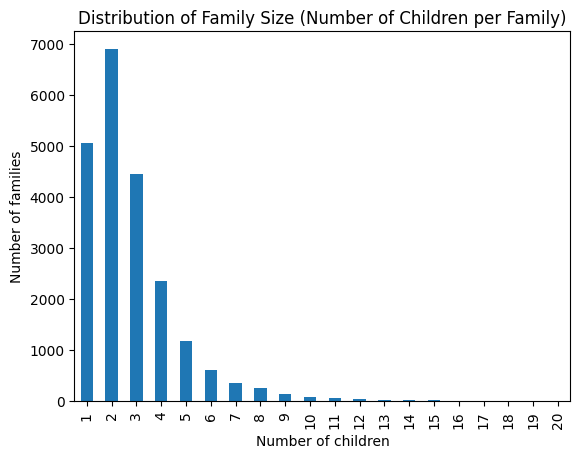

In [18]:
import matplotlib.pyplot as plt

dist = kids_per_parent["n_children"].value_counts().sort_index()

plt.figure()
dist.plot(kind="bar")
plt.xlabel("Number of children")
plt.ylabel("Number of families")
plt.title("Distribution of Family Size (Number of Children per Family)")
plt.show()

# Save the data

In [19]:
# Save edge list
fims_links[["parent_id","child_id"]].drop_duplicates().to_csv("fims_parent_child_edges.csv", index=False)

# Save a thin PSID lookup for node labels/attributes
keep = [c for c in ["person_id","ER32000","ER32006","ER30004","V103","ER30584","ER34952","ER35152"] if c in psid_raw.columns]
psid_person_lu = psid_raw[keep].drop_duplicates("person_id")
psid_person_lu.to_csv("psid_person_lookup.csv", index=False)

# Save family size summary (optional)
kids_per_parent.to_csv("kids_per_parent.csv", index=False)
